# Notebook Setup + Importing Data

In [ ]:
import numpy
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

import random
from random import seed
from random import sample

import plotly.express as px # to plot the time series plot
from sklearn import metrics # for the evaluation
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#GPU, can use in model training
#! nvidia-smi

https://towardsdatascience.com/time-series-prediction-with-lstm-in-tensorflow-42104db39340

https://www.tensorflow.org/tutorials/structured_data/time_series#split_the_data

https://pandas.pydata.org/docs/user_guide/window.html


In [ ]:
#title = "dec_2015_attack (1)"
#df = pd.read_csv("/content/drive/MyDrive/CI Project/" + title + ".csv")
title = "SWaT_Dataset_Normal_v0"
attackTitle = "dec_2015_attack"
df = pd.read_csv("/content/drive/MyDrive/CI Project/" + title + ".csv")
df_attack = pd.read_csv("/content/drive/MyDrive/CI Project/" + attackTitle + ".csv")
df['P102'] = df['P102'].fillna(1)
df_attack['P102'] = df_attack['P102'].fillna(1)

# Data Prepraration

In [ ]:
df.keys()

Index([' Timestamp', 'FIT101', 'LIT101', 'MV101', 'P101', 'P102', 'AIT201',
       'AIT202', 'AIT203', 'FIT201', 'MV201', 'P201', 'P202', 'P203', 'P204',
       'P205', 'P206', 'DPIT301', 'FIT301', 'LIT301', 'MV301', 'MV302',
       'MV303', 'MV304', 'P301', 'P302', 'AIT401', 'AIT402', 'FIT401',
       'LIT401', 'P401', 'P402', 'P403', 'P404', 'UV401', 'AIT501', 'AIT502',
       'AIT503', 'AIT504', 'FIT501', 'FIT502', 'FIT503', 'FIT504', 'P501',
       'P502', 'PIT501', 'PIT502', 'PIT503', 'FIT601', 'P601', 'P602', 'P603',
       'Normal/Attack'],
      dtype='object')

In [ ]:
df

,Timestamp,FIT101,LIT101,MV101,P101,P102,AIT201,AIT202,AIT203,FIT201,...,P501,P502,PIT501,PIT502,PIT503,FIT601,P601,P602,P603,Normal/Attack
0,22/12/2015 4:00:00 PM,2.470294,261.5804,2,2,1,244.3284,8.190080,306.1010,2.471278,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
1,22/12/2015 4:00:01 PM,2.457163,261.1879,2,2,1,244.3284,8.190080,306.1010,2.468587,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
2,22/12/2015 4:00:02 PM,2.439548,260.9131,2,2,1,244.3284,8.190080,306.1010,2.467305,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
3,22/12/2015 4:00:03 PM,2.428338,260.2850,2,2,1,244.3284,8.190080,306.1010,2.466536,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
4,22/12/2015 4:00:04 PM,2.424815,259.8925,2,2,1,244.4245,8.190080,306.1010,2.466536,...,1,1,10.02948,0.000000,4.277749,0.000256,1,1,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
496795,28/12/2015 9:59:55 AM,2.460366,523.0430,2,2,1,262.0161,8.396437,328.5055,2.442316,...,2,1,250.81710,1.778105,189.855200,0.000128,1,1,1,Normal
496796,28/12/2015 9:59:56 AM,2.448836,522.9645,2,2,1,262.0161,8.396437,328.5055,2.442316,...,2,1,250.81710,1.778105,189.502700,0.000128,1,1,1,Normal
496797,28/12/2015 9:59:57 AM,2.434744,522.8860,2,2,1,262.0161,8.396437,328.6337,2.444879,...,2,1,250.81710,1.778105,189.502700,0.000128,1,1,1,Normal
496798,28/12/2015 9:59:58 AM,2.428338,522.9252,2,2,1,262.0161,8.396437,328.6337,2.445391,...,2,1,250.81710,1.649953,189.502700,0.000128,1,1,1,Normal


In [ ]:
#selects sensors and adds them to the filtered dataframe
df_filtered = df[['FIT101','LIT101','P101', 'P102', 'FIT201', 'AIT202', 'DPIT301', 'FIT301', 'FIT601', 'P501', 'PIT501', 'PIT503', 'PIT502']]
df_attack_filtered = df_attack[['FIT101','LIT101','P101', 'P102', 'FIT201', 'AIT202', 'DPIT301', 'FIT301', 'FIT601', 'P501', 'PIT501', 'PIT503', 'PIT502']]

In [ ]:
#normalizes the dataframe
normalized_df=(abs(df_filtered-df_filtered.mean()))/df_filtered.std()
normalized_df_attack = (abs(df_attack_filtered-df_attack_filtered.mean()))/df_attack_filtered.std()
normalized_df

,FIT101,LIT101,P101,P102,FIT201,AIT202,DPIT301,FIT301,FIT601,P501,PIT501,PIT503,PIT502
0,0.550791,2.619377,0.582184,NaN,0.604946,2.191734,0.626328,0.488811,0.094974,12.158591,12.228493,12.167418,5.452556
1,0.539225,2.622546,0.582184,NaN,0.602413,2.191734,0.626328,0.487881,0.094974,12.158591,12.228493,12.167418,5.452556
2,0.523710,2.624764,0.582184,NaN,0.601207,2.191734,0.632951,0.486485,0.094974,12.158591,12.228493,12.167418,5.452556
3,0.513836,2.629833,0.582184,NaN,0.600483,2.191734,0.632951,0.486485,0.094974,12.158591,12.228493,12.167418,5.452556
4,0.510733,2.633001,0.582184,NaN,0.600483,2.191734,0.632951,0.486485,0.094974,12.158591,12.228493,12.167418,5.452556
...,...,...,...,...,...,...,...,...,...,...,...,...,...
496795,0.542046,0.508960,0.582184,NaN,0.577687,0.095136,0.471123,0.460738,0.095836,0.082246,0.005624,0.027232,2.742081
496796,0.531891,0.509594,0.582184,NaN,0.577687,0.095136,0.471123,0.458256,0.095836,0.082246,0.005624,0.050292,2.742081
496797,0.519478,0.510228,0.582184,NaN,0.580100,0.095136,0.471123,0.455464,0.095836,0.082246,0.005624,0.050292,2.742081
496798,0.513836,0.509911,0.582184,NaN,0.580581,0.095136,0.471123,0.454380,0.095836,0.082246,0.005624,0.050292,2.151475


In [ ]:
#does scaling and transforming
for i in df_filtered.select_dtypes('object').columns:
    le = LabelEncoder().fit(df_filtered[i])
    df_filtered[i] = le.transform(df_filtered[i])
X_scaler = MinMaxScaler()
X_data = X_scaler.fit_transform(df_filtered[['FIT101','LIT101','P101', 'P102', 'FIT201', 'AIT202', 'DPIT301', 'FIT301', 'FIT601', 'P501', 'PIT501', 'PIT503', 'PIT502']])

#same for attack
for i in df_attack_filtered.select_dtypes('object').columns:
    le_attack = LabelEncoder().fit(df_attack_filtered[i])
    df_attack_filtered[i] = le.transform(df_attack_filtered[i])
X_scaler_attack = MinMaxScaler()
X_data_attack = X_scaler_attack.fit_transform(df_attack_filtered[['FIT101','LIT101','P101', 'P102', 'FIT201', 'AIT202', 'DPIT301', 'FIT301', 'FIT601', 'P501', 'PIT501', 'PIT503', 'PIT502']])


In [ ]:
#window splitting function
def windowing_and_splitting(dataset, dataset2, start, train, vali, window, horizon):
    x_dataset = []
    y_dataset = []
    x_train = []
    y_train = []
    x_vali = []
    y_vali = []
    x_test = []
    y_test = []
    x_attack = []
    y_attack = []

    end = len(dataset)

    for i in range(start, end-5):
        indices = range(i, i+window)
        x_dataset.append(dataset[indices])
        indicey = range(i+window, i+1+window)
        y_dataset.append(dataset[i+window])

    temp = list(zip(x_dataset, y_dataset))
    random.shuffle(temp)
    res1, res2 = zip(*temp)

    for i in range(start, train):
        x_train.append(res1[i])
        y_train.append(res2[i])

    for i in range(train, vali):
        x_vali.append(res1[i])
        y_vali.append(res2[i])
    for i in range(vali, len(dataset)-5):
        x_test.append(res1[i])
        y_test.append(res2[i])

    for i in range(start, len(dataset2)-5):
        indices = range(i, i+window)
        x_attack.append(dataset2[indices])
        indicey = range(i+window, i+1+window)
        y_attack.append(dataset2[i+window])

    return np.array(x_train), np.array(y_train), np.array(x_vali), np.array(y_vali), np.array(x_test), np.array(y_test), np.array(x_attack), np.array(y_attack)

In [ ]:
#splits windows and creates train and validation sets
hist_window = 5
horizon = 1
TRAIN_SPLIT = 400000
VALI_SPLIT = 450000

x_train, y_train, x_vali, y_vali, x_test, y_test, x_attack, y_attack = windowing_and_splitting(X_data, X_data_attack, 0, TRAIN_SPLIT, VALI_SPLIT, hist_window, horizon)

In [ ]:
std = np.std(x_train)
threshold = 5 * std

print(threshold)

2.080635464892767


In [ ]:
print(x_train[0])
print (y_train[0])
print(x_vali[0])
print (y_vali[0])
print(x_test[0])
print (y_test[0])
print(x_attack[0])
print (y_attack[0])

print(X_data.shape)
print(x_train.shape)
print(y_train.shape)
print(x_vali.shape)
print(y_vali.shape)
print(x_test.shape)
print(y_test.shape)
print(x_attack.shape)
print(y_attack.shape)

[[0.94131344 0.43623782 1.         0.         0.98222906 0.21718181
  0.03838568 0.07142079 0.05192471 1.         0.94267996 0.94160161
  0.30131016]
 [0.93664693 0.43686281 1.         0.         0.98222906 0.21718181
  0.01365498 0.07907888 0.10726217 1.         0.94267996 0.94160161
  0.30131016]
 [0.93011309 0.43699665 1.         0.         0.98222906 0.21718181
  0.00182066 0.07630892 0.2164325  1.         0.94267996 0.94160161
  0.34061128]
 [0.92486263 0.43695208 1.         0.         0.98166273 0.21718181
  0.00121378 0.06517487 0.34461131 1.         0.94211613 0.94160161
  0.34061128]
 [0.91739585 0.43708592 1.         0.         0.98166273 0.21718181
  0.00121378 0.04909843 0.49965152 1.         0.9418655  0.94079009
  0.30131016]]
[0.91377885 0.43655031 1.         0.         0.98166273 0.21718181
 0.00121378 0.03030632 0.64272898 1.         0.9418655  0.94030358
 0.30131016]
[[8.82860757e-01 4.56547783e-01 1.00000000e+00 0.00000000e+00
  9.76099485e-01 1.88678678e-01 9.394629

In [ ]:
lstm_model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(20, input_shape=(x_train.shape[1], x_train.shape[2])),
    tf.keras.layers.Dense(13)
])
lstm_model.compile(optimizer='adam', loss='mse')
lstm_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 20)                2720      
                                                                 
 dense (Dense)               (None, 13)                273       
                                                                 
Total params: 2,993
Trainable params: 2,993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_path = 'sequential_7.h5'
early_stopings = tf.keras.callbacks.EarlyStopping(monitor='val_loss', min_delta=0, patience=10, verbose=1, mode='min')
checkpoint =  tf.keras.callbacks.ModelCheckpoint(model_path, monitor='val_loss', save_best_only=True, mode='min', verbose=0)
callbacks=[early_stopings,checkpoint]
history = lstm_model.fit(x_train, y_train,epochs=100,steps_per_epoch=100,validation_data=(x_vali, y_vali),validation_steps=50,verbose=1,callbacks=callbacks)

Epoch 1/100
100/100 [==============================] - 8s 11ms/step - loss: 0.1812 - val_loss: 0.0364
Epoch 2/100
100/100 [==============================] - 1s 10ms/step - loss: 0.0251 - val_loss: 0.0166
Epoch 3/100
100/100 [==============================] - 1s 9ms/step - loss: 0.0117 - val_loss: 0.0075
Epoch 4/100
100/100 [==============================] - 1s 10ms/step - loss: 0.0051 - val_loss: 0.0034
Epoch 5/100
100/100 [==============================] - 1s 8ms/step - loss: 0.0028 - val_loss: 0.0024
Epoch 6/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0021 - val_loss: 0.0020
Epoch 7/100
100/100 [==============================] - 1s 7ms/step - loss: 0.0019 - val_loss: 0.0017
Epoch 8/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0017 - val_loss: 0.0016
Epoch 9/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0015 - val_loss: 0.0014
Epoch 10/100
100/100 [==============================] - 1s 6ms/step - loss: 0.0014 - val

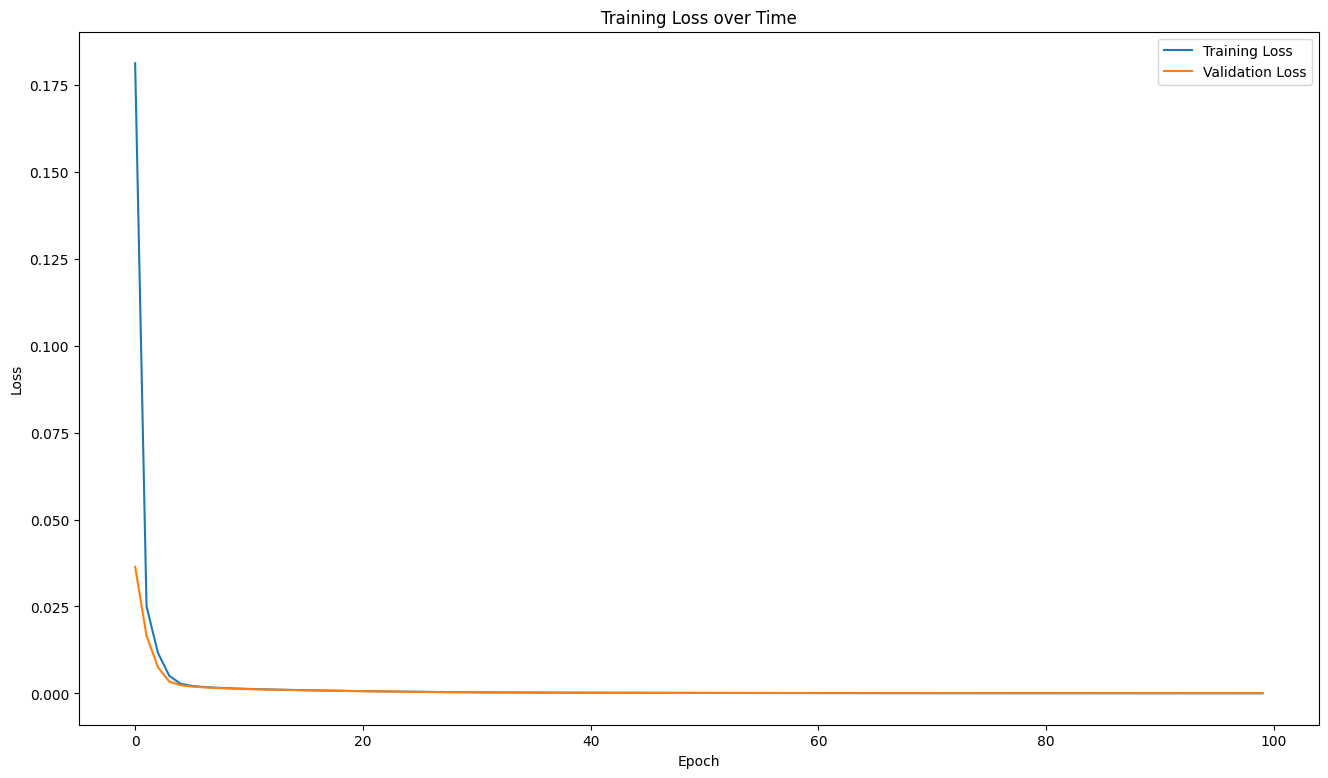

12500/12500 [==============================] - 34s 3ms/step - loss: 6.2735e-05
Loss: 6.273545295698568e-05


In [ ]:
plt.figure(figsize=(16,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training Loss over Time')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])
plt.show()

loss = lstm_model.evaluate(x_train, y_train)
print(f"Loss: {loss}")

In [ ]:
lstm_model.save("/content/drive/MyDrive/CI Project/MultiStage_Model")

1463/1463 [==============================] - 3s 2ms/step


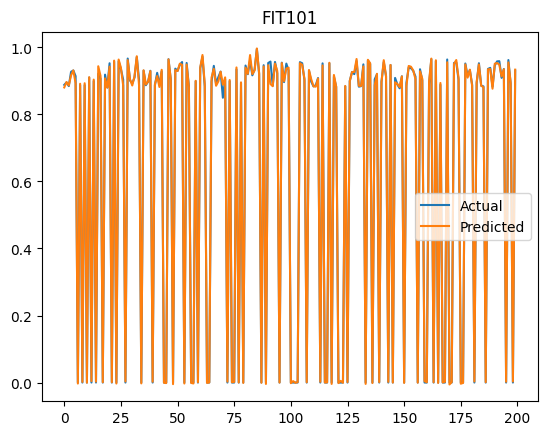

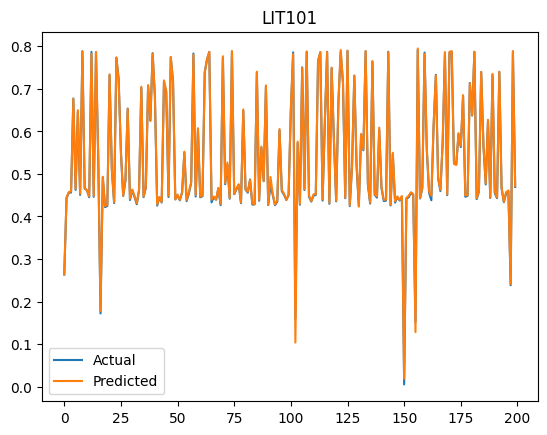

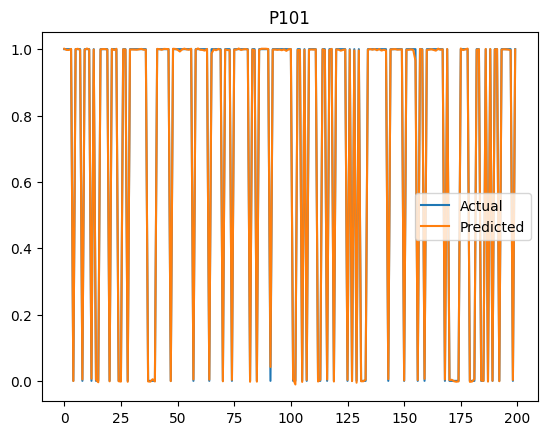

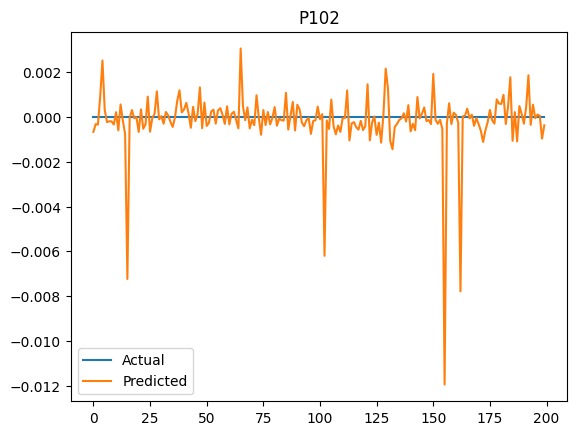

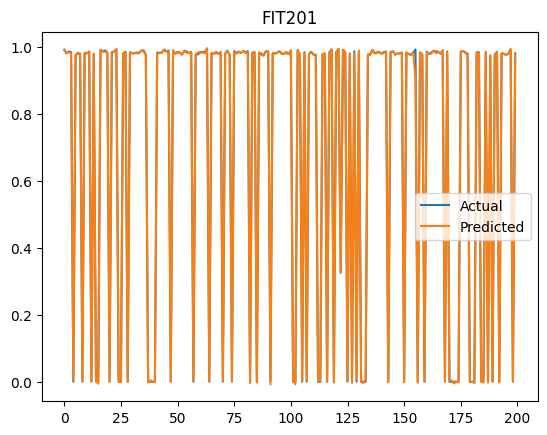

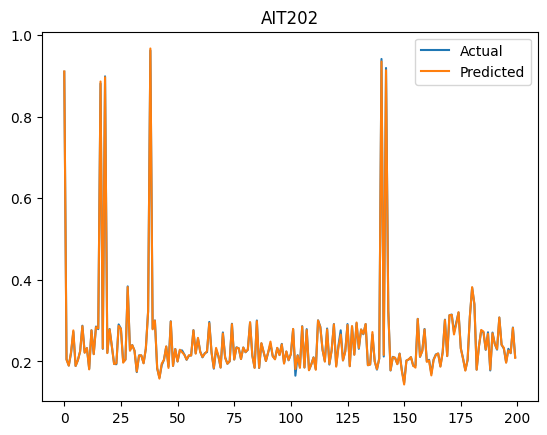

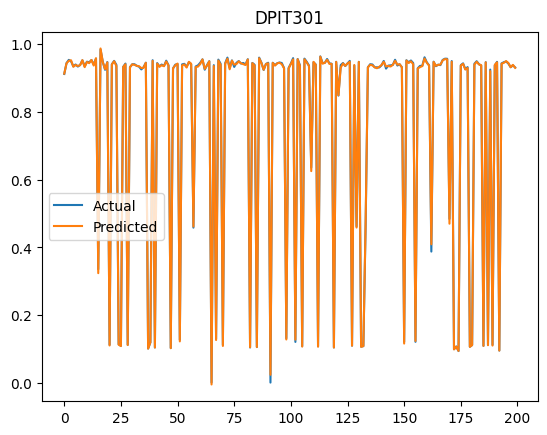

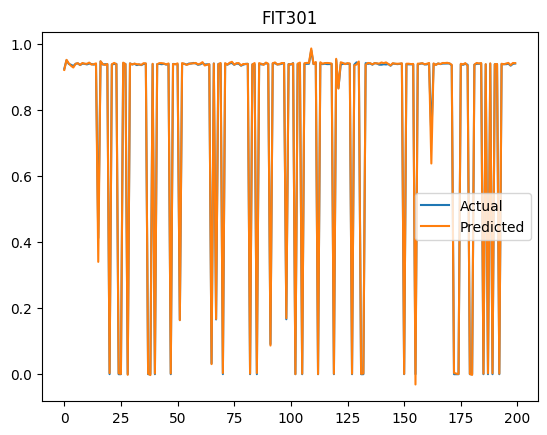

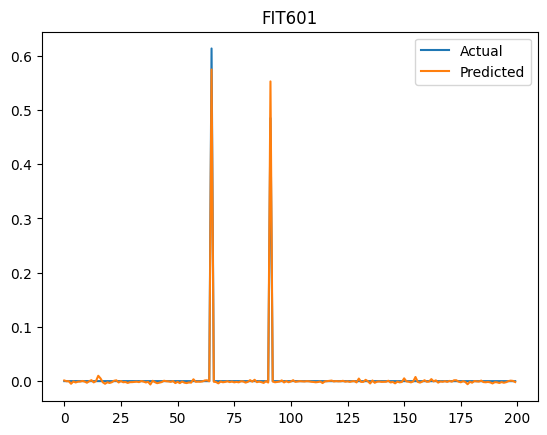

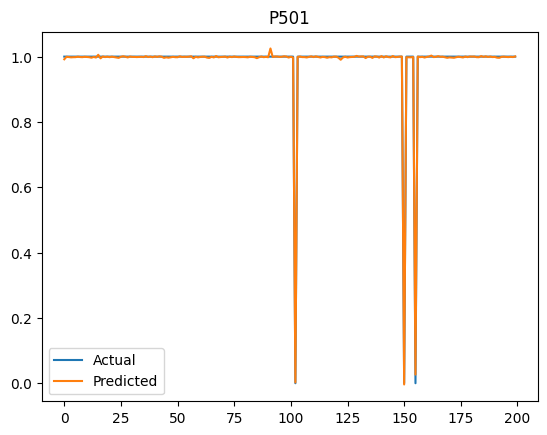

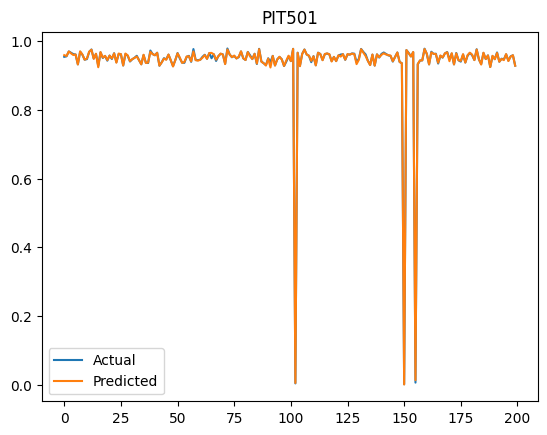

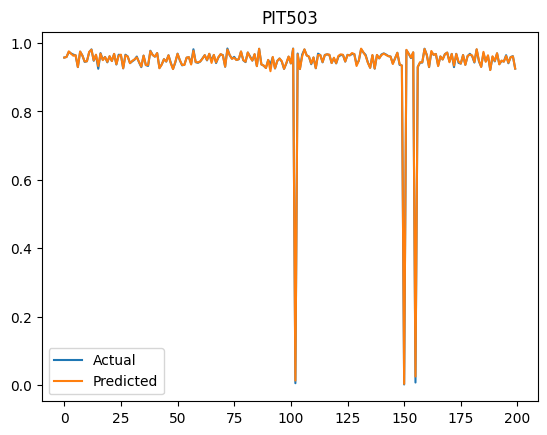

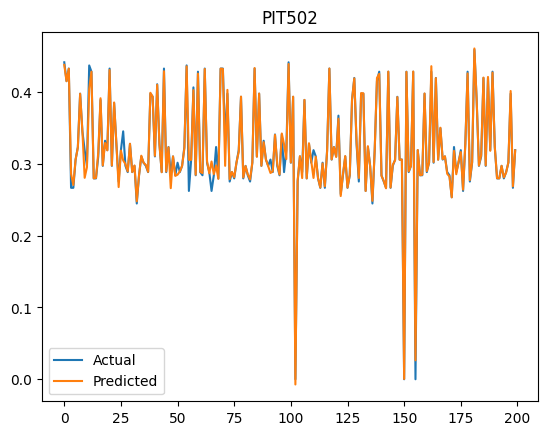

In [ ]:
#predict on test set
y_pred = lstm_model.predict(x_test)

x = list(range(0, 200))

for i in range(0, 13):
   plt.figure()
   plt.plot(x, y_test[0:200, i], label='Actual')
   plt.plot(x, y_pred[0:200, i], label='Predicted')
   plt.title(normalized_df.columns[i])
   plt.legend()
plt.show()

In [ ]:
y_attack_pred = lstm_model.predict(x_attack)

14060/14060 [==============================] - 29s 2ms/step


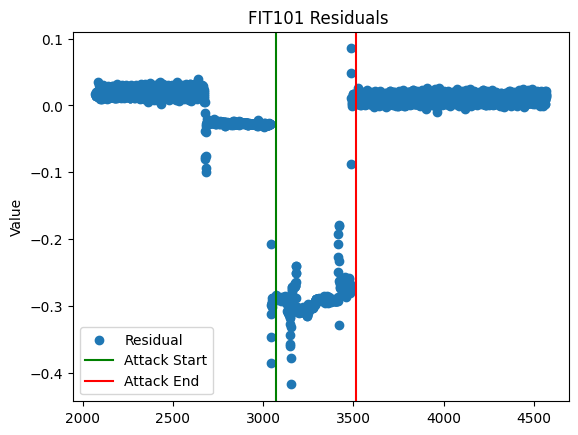

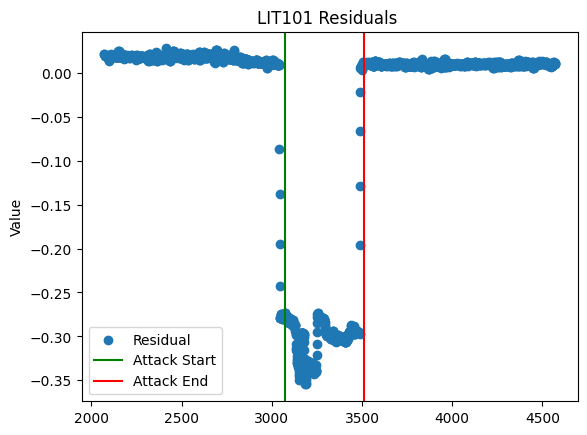

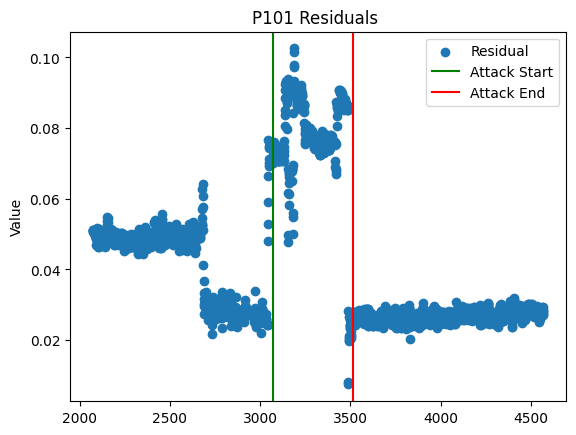

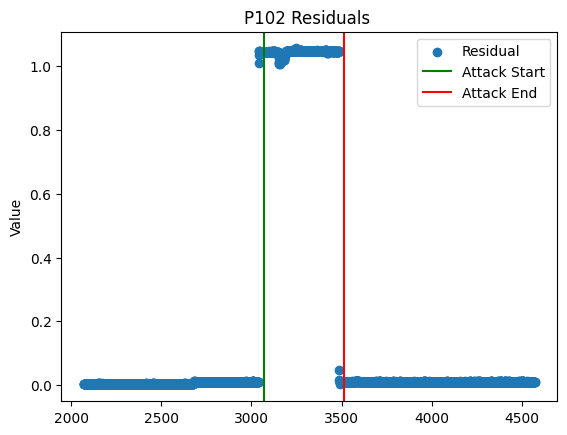

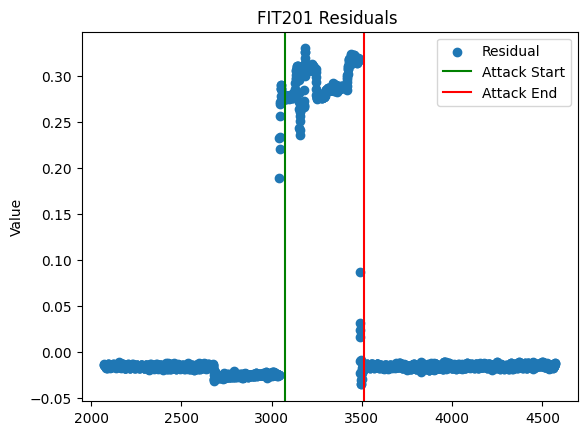

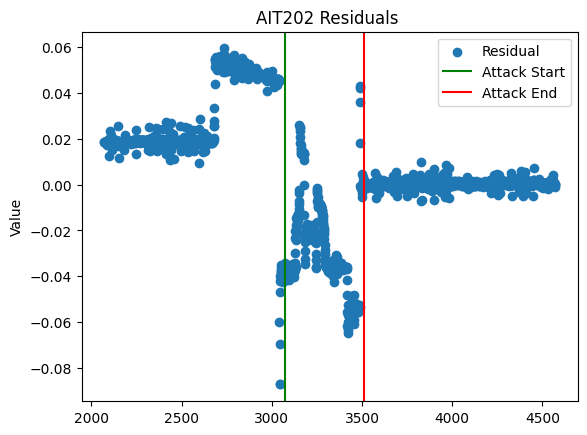

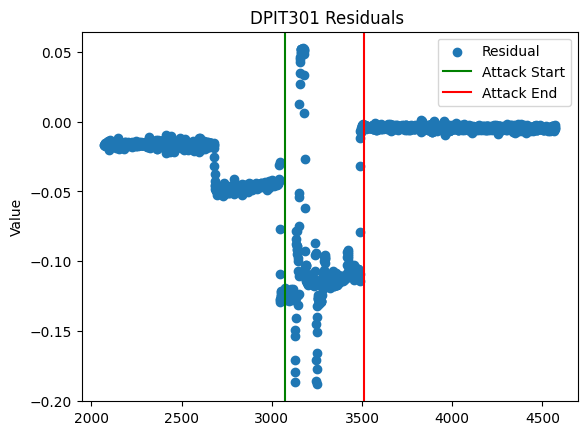

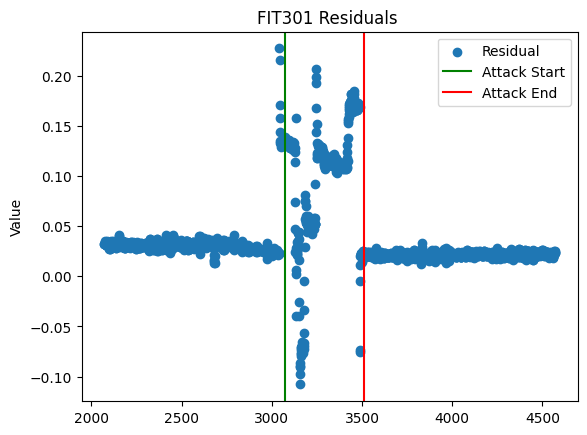

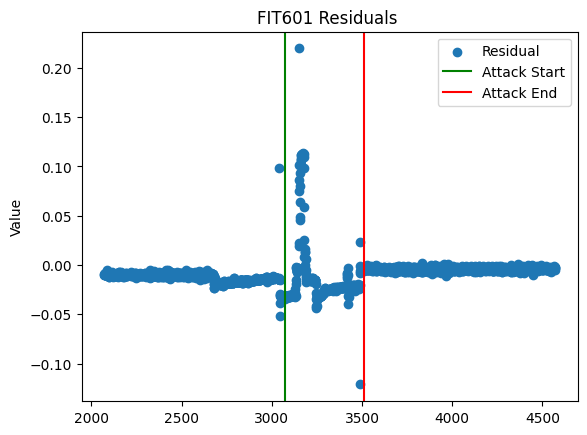

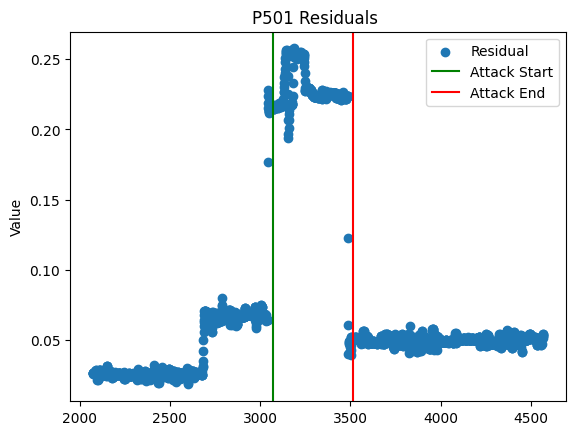

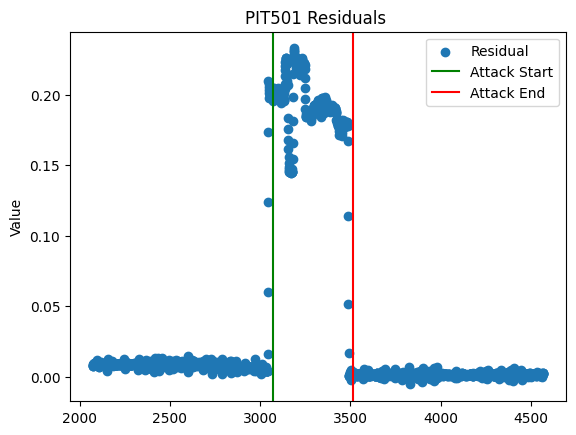

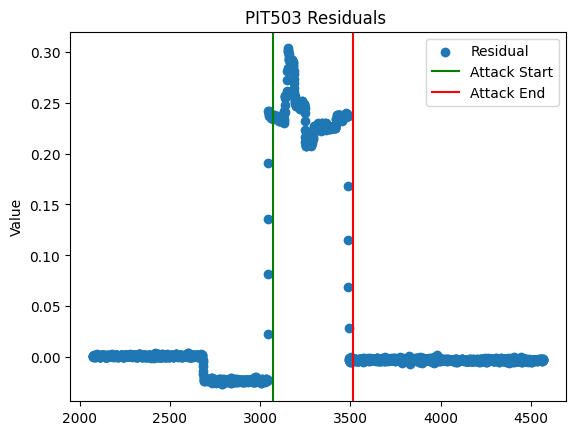

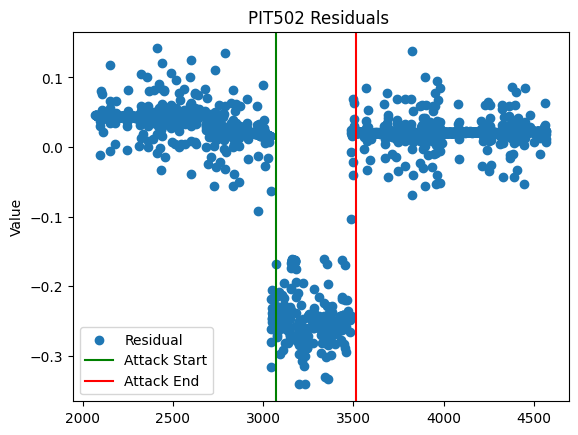

In [ ]:
#residuals and graphs of attack data
#attacks: 10:51:08 and 11:47:39
#attack 1 index: 3071 - 3513
#attack 2 index: 6462 - 6851

newy_test_attack = np.reshape(y_attack, (13, 449914))
newy_pred_attack = np.reshape(y_attack_pred, (13, 449914))

pltList = []
for i in range(13):

  fig = plt.figure() # intialize the fig
  residuals = y_attack[:,i] - y_attack_pred[:,i]
  x = list(range(2071,4571))

  plt.scatter(x, residuals[2071:4571])
  plt.axvline(x=3071, color='Green')
  plt.axvline(x=3513, color='red')
  plt.title(str(normalized_df.columns[i]) + " Residuals ")
  plt.ylabel("Value")
  plt.legend(('Residual','Attack Start', 'Attack End'))
  plt.show()
  pltList.append(fig)

pdf = PdfPages("/content/drive/MyDrive/CI Project/13Sensors.pdf") # create a pdf document
for plot in pltList:
  pdf.savefig(plot, orientation="landscape") # save plot to pdf

pdf.close()


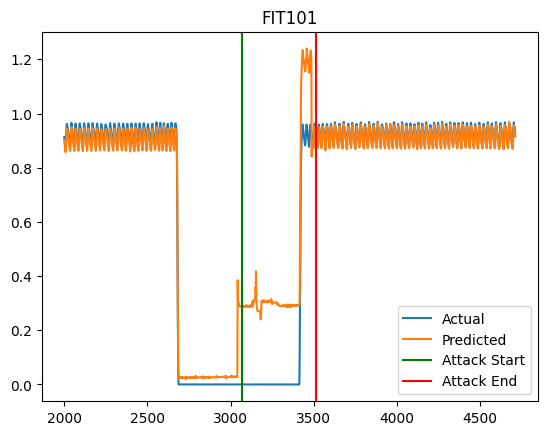

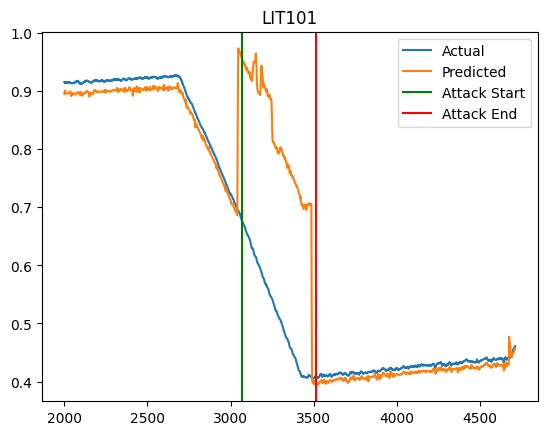

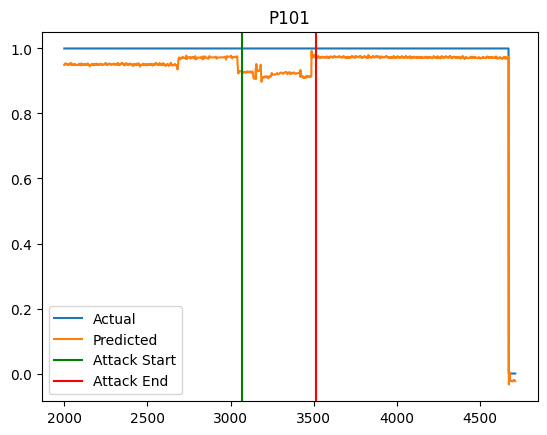

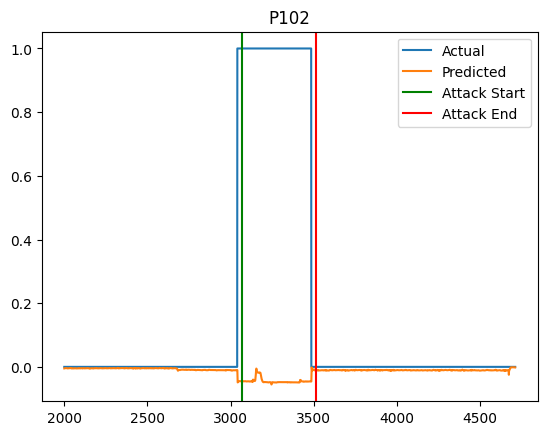

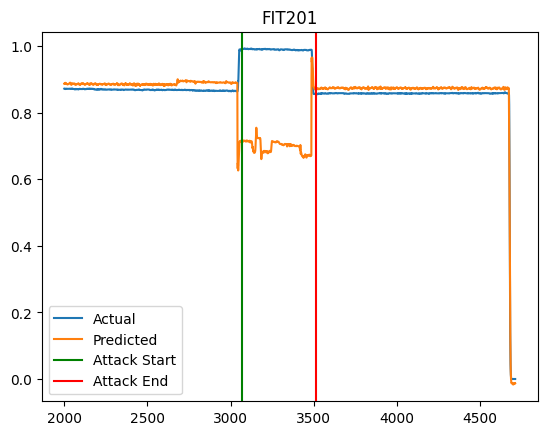

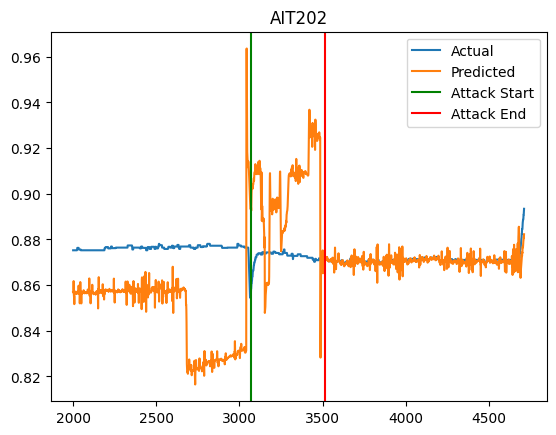

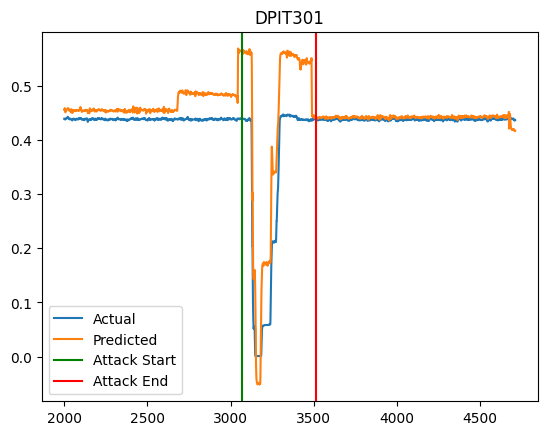

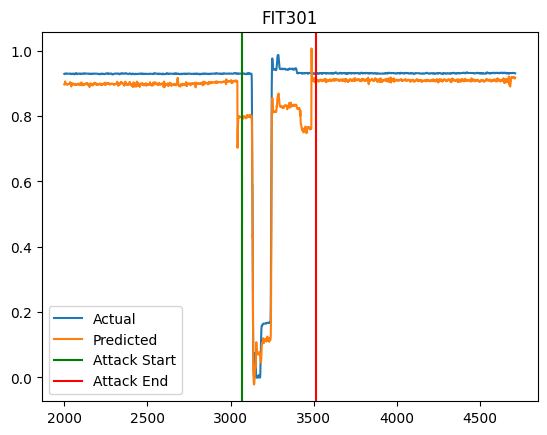

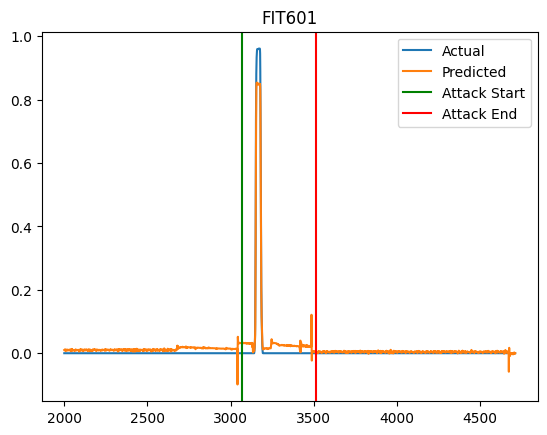

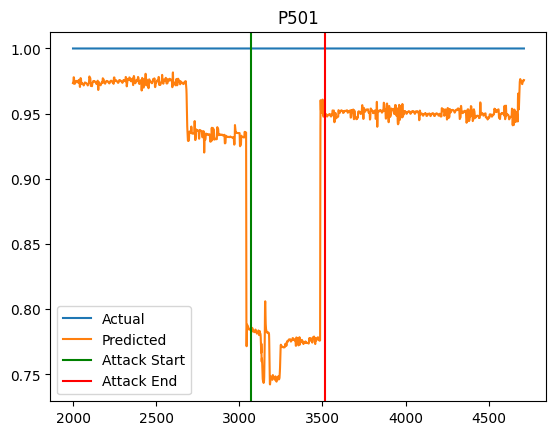

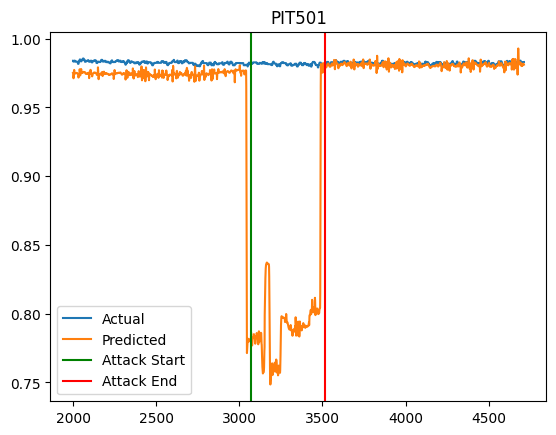

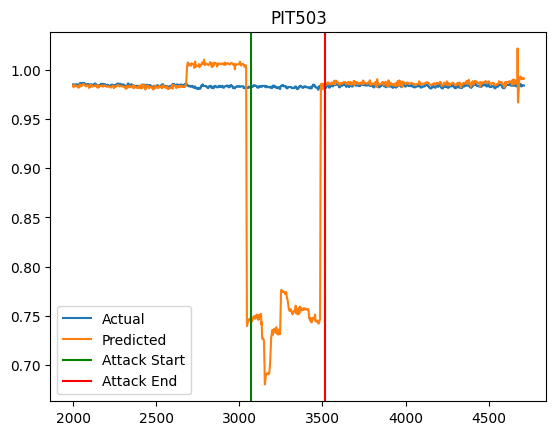

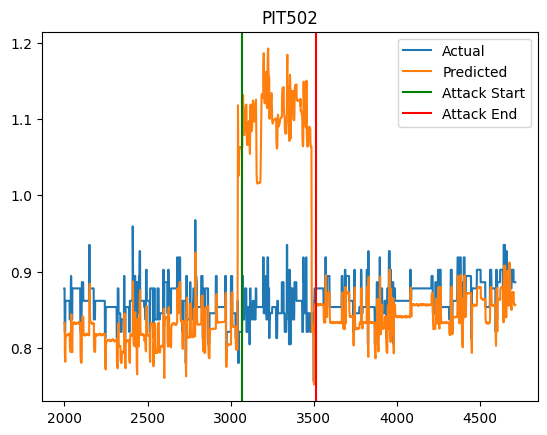

In [ ]:
for i in range(0, 13):
   x = list(range(2000,4713))
   plt.figure()
   plt.plot(x, y_attack[2000:4713, i], label='Actual')
   plt.plot(x, y_attack_pred[2000:4713, i], label='Predicted')
   plt.axvline(x=3071, color='Green', label='Attack Start')
   plt.axvline(x=3513, color='red', label='Attack End')
   plt.title(normalized_df.columns[i])
   plt.legend()
plt.show()

In [ ]:
def timeseries_evaluation_metrics_func(y_true, y_pred):
     def mean_absolute_percentage_error(y_true, y_pred):
         y_true, y_pred = np.array(y_true), np.array(y_pred)
         return np.mean(np.abs((y_true - y_pred) / y_true)) * 100
     print('Evaluation metric results:-')
     print(f'MSE is : {metrics.mean_squared_error(y_true, y_pred)}')
     print(f'MAE is : {metrics.mean_absolute_error(y_true, y_pred)}')
     print(f'RMSE is : {np.sqrt(metrics.mean_squared_error(y_true, y_pred))}')
     #print(f'MAPE is : {mean_absolute_percentage_error(y_true, y_pred)}')
     print(f'R2 is : {metrics.r2_score(y_true, y_pred)}\n\n')


In [ ]:
print("Normal data test set:")
print(timeseries_evaluation_metrics_func(y_test, y_pred))
print()
print("Attack dataset:")
print(timeseries_evaluation_metrics_func(y_attack, y_attack_pred))

Normal data test set:
Evaluation metric results:-
MSE is : 7.248424069651835e-05
MAE is : 0.0021587400617193377
RMSE is : 0.008513767714503276
R2 is : 0.9207245403809436


None

Attack dataset:
Evaluation metric results:-
MSE is : 0.002090369923087035
MAE is : 0.018533290870647496
RMSE is : 0.04572056345985945
R2 is : 0.8506625036577218


None
